In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.geocoders import Nominatim
import time

## Intital Breakdown of Data

In [4]:
# Loaded dataset and displayed the first 50 rows
flights = pd.read_csv("Resources/Consumer_Airfare_Report__Table_1a_-_All_U.S._Airport_Pair_Markets_20240712.csv", low_memory=False)
flights.head(50)

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
5,Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,10721,ABQ,...,324.97,AA,0.4263,323.73,WN,0.1609,298.20,NaN,NaN,202131014010721ABQBOS
6,Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,13296,ABQ,...,315.90,WN,0.7285,270.42,WN,0.7285,270.42,NaN,NaN,202131014013296ABQMHT
7,Table1a,2021,3,30140,30721,"Albuquerque, NM","Boston, MA (Metropolitan Area)",10140,14307,ABQ,...,329.22,WN,0.5415,271.60,WN,0.5415,271.60,NaN,NaN,202131014014307ABQPVD
8,Table1a,2021,3,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,...,255.89,WN,0.7212,244.89,WN,0.7212,244.89,NaN,NaN,202131014010821ABQBWI
9,Table1a,2021,3,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,...,291.16,AA,0.4404,296.88,WN,0.3197,247.20,NaN,NaN,202131014011278ABQDCA


In [5]:
# All the columns in the dataset
flights.columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

In [6]:
# Unique cities
flights['city1'].unique()

array(['Allentown/Bethlehem/Easton, PA', 'Albuquerque, NM',
       'Nantucket, MA', 'Colorado Springs, CO', 'Dallas/Fort Worth, TX',
       'Pittsburgh, PA', 'Huntsville, AL', 'Albany, NY', 'Amarillo, TX',
       'Denver, CO', 'Atlanta, GA (Metropolitan Area)', 'Austin, TX',
       'Asheville, NC', 'Tucson, AZ', 'Phoenix, AZ', 'Hartford, CT',
       'Seattle, WA', 'Birmingham, AL', 'El Paso, TX',
       'Cleveland, OH (Metropolitan Area)', 'Nashville, TN', 'Boise, ID',
       'Boston, MA (Metropolitan Area)', 'Burlington, VT', 'Buffalo, NY',
       'Bozeman, MT', 'Washington, DC (Metropolitan Area)', 'Chicago, IL',
       'Charleston, SC', 'Cedar Rapids/Iowa City, IA', 'Charlotte, NC',
       'Columbus, OH', 'St. Louis, MO', 'Myrtle Beach, SC',
       'Jacksonville, FL', 'Detroit, MI', 'Des Moines, IA', 'Houston, TX',
       'Orlando, FL', 'Panama City, FL', 'Valparaiso, FL', 'Eugene, OR',
       'Key West, FL', 'Fargo, ND', 'Kalispell, MT',
       'Minneapolis/St. Paul, MN',
       'N

In [7]:
# All the datatypes of the columns
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

## Customizing Data

In [121]:
# Created columns of just the states
flights['Departure State'] = flights['city1'].apply(lambda x: x.split(',')[-1])
flights['Destination State'] = flights['city2'].apply(lambda x: x.split(',')[-1])

flights.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk,Departure State,Destination State
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE,PA,FL (Metropolitan Area)
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA,PA,FL (Metropolitan Area)
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL,NM,TX
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW,NM,TX
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX,NM,AZ


In [123]:
# Created a new dataset with only need columns
season_flights = flights[['Year','quarter','city1','city2','passengers','fare','Departure State','Destination State']]

In [125]:
# Rename columns
season_flights = season_flights.rename(columns={'quarter': 'Quarter',
                                               'city1': 'Departure City',
                                               'city2': 'Destination City',
                                               'passengers': 'Passengers',
                                               'fare': 'Fare'})
season_flights.head()

,Year,Quarter,Departure City,Destination City,Passengers,Fare,Departure State,Destination State
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",180,81.43,PA,FL (Metropolitan Area)
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",19,208.93,PA,FL (Metropolitan Area)
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",204,184.56,NM,TX
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",264,182.64,NM,TX
4,2021,3,"Albuquerque, NM","Phoenix, AZ",398,177.11,NM,AZ


In [127]:
# Created a seasons column
def season(quarter):
    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    elif quarter == 4:
        return 'Fall'

season_flights['Season'] = season_flights['Quarter'].apply(season)
season_flights.head()

,Year,Quarter,Departure City,Destination City,Passengers,Fare,Departure State,Destination State,Season
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",180,81.43,PA,FL (Metropolitan Area),Summer
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",19,208.93,PA,FL (Metropolitan Area),Summer
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",204,184.56,NM,TX,Summer
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",264,182.64,NM,TX,Summer
4,2021,3,"Albuquerque, NM","Phoenix, AZ",398,177.11,NM,AZ,Summer


In [129]:
# Reformat the city columns to remove '(Metropolitan Area)'
season_flights['Departure City'] = season_flights['Departure City'].str.replace(' (Metropolitan Area)', '')
season_flights['Destination City'] = season_flights['Destination City'].str.replace(' (Metropolitan Area)', '')

season_flights.head()

,Year,Quarter,Departure City,Destination City,Passengers,Fare,Departure State,Destination State,Season
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL",180,81.43,PA,FL (Metropolitan Area),Summer
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL",19,208.93,PA,FL (Metropolitan Area),Summer
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",204,184.56,NM,TX,Summer
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",264,182.64,NM,TX,Summer
4,2021,3,"Albuquerque, NM","Phoenix, AZ",398,177.11,NM,AZ,Summer


## Analysis of Data

In [109]:
# Dataframe of most popular destination by season
season_city = season_flights.groupby(['Season', 'Destination City'])['Passengers'].sum().reset_index()
season_city = season_city.sort_values(['Season', 'Passengers'], ascending=False)
season_city.head(10)

,Season,Destination City,Passengers
389,Winter,"New York City, NY",2360690
442,Winter,"Washington, DC",2178756
418,Winter,"San Francisco, CA",2041188
372,Winter,"Los Angeles, CA",1100458
435,Winter,"Tampa, FL",973321
379,Winter,"Miami, FL",938379
400,Winter,"Phoenix, AZ",865791
394,Winter,"Orlando, FL",755691
423,Winter,"Seattle, WA",497357
358,Winter,"Houston, TX",409602


In [111]:
# Top 10 popular citites by season
popular_city = season_city.groupby('Season').head(10).reset_index(drop=True)
popular_city

,Season,Destination City,Passengers
0,Winter,"New York City, NY",2360690
1,Winter,"Washington, DC",2178756
2,Winter,"San Francisco, CA",2041188
3,Winter,"Los Angeles, CA",1100458
4,Winter,"Tampa, FL",973321
5,Winter,"Miami, FL",938379
6,Winter,"Phoenix, AZ",865791
7,Winter,"Orlando, FL",755691
8,Winter,"Seattle, WA",497357
9,Winter,"Houston, TX",409602


In [17]:
# Top 10 citites
city_totals = season_flights.groupby('Destination City')['Passengers'].sum().reset_index()
city_totals = city_totals.sort_values(by='Passengers', ascending=False).reset_index(drop=True)
top_10 = city_totals.head(10)
top_10

,Destination City,Passengers
0,"New York City, NY",10062064
1,"Washington, DC",9525165
2,"San Francisco, CA",8975111
3,"Los Angeles, CA",4767077
4,"Tampa, FL",3466433
5,"Miami, FL",3219544
6,"Phoenix, AZ",3031354
7,"Orlando, FL",2853068
8,"Seattle, WA",2388647
9,"Houston, TX",1685811


In [18]:
# Top 10 popular citites over 5 year intervals
season_flights['5 Year Interval'] = (season_flights['Year'] // 5) * 5
popular_city_time = season_flights[season_flights['Destination City'].isin(top_10['Destination City'])]
popular_city_time = popular_city_time.groupby(['Destination City', '5 Year Interval'])['Passengers'].sum().reset_index()
popular_city_time.head(10)

,Destination City,5 Year Interval,Passengers
0,"Houston, TX",1990,55340
1,"Houston, TX",1995,233305
2,"Houston, TX",2000,278361
3,"Houston, TX",2005,293975
4,"Houston, TX",2010,291361
5,"Houston, TX",2015,313213
6,"Houston, TX",2020,220256
7,"Los Angeles, CA",1990,124759
8,"Los Angeles, CA",1995,513086
9,"Los Angeles, CA",2000,725471


In [19]:
# Number of flights from one city to another
route_counts = season_flights.groupby(['Season', 'Departure City', 'Destination City']).size().reset_index(name='Flights')

# Most common route per season
most_common_routes = route_counts.groupby('Season').apply(lambda x: x.nlargest(5, 'Flights')).reset_index(drop=True)
most_common_routes

,Season,Departure City,Destination City,Flights
0,Fall,"Los Angeles, CA","New York City, NY",782
1,Fall,"New York City, NY","San Francisco, CA",517
2,Fall,"New York City, NY","Washington, DC",483
3,Fall,"Los Angeles, CA","Washington, DC",443
4,Fall,"Boston, MA","Los Angeles, CA",422
5,Spring,"Los Angeles, CA","New York City, NY",797
6,Spring,"New York City, NY","San Francisco, CA",512
7,Spring,"New York City, NY","Washington, DC",493
8,Spring,"Los Angeles, CA","Washington, DC",449
9,Spring,"Boston, MA","Los Angeles, CA",420


## Visuals

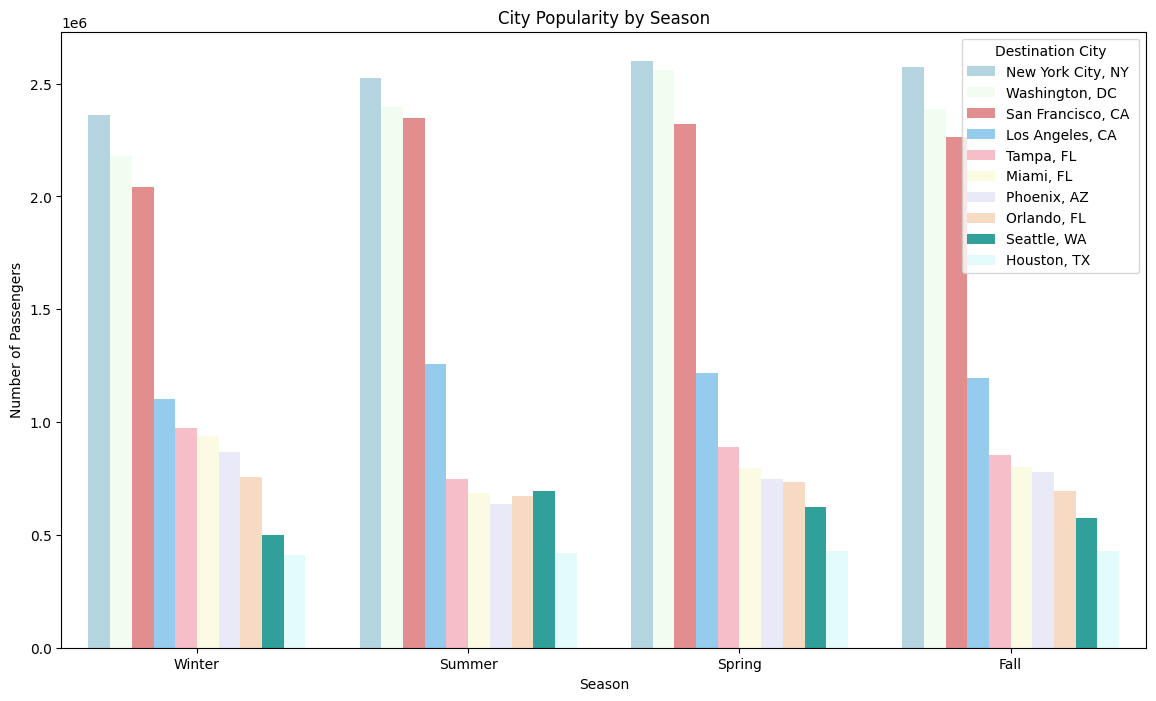

In [237]:
# Bar plot for city popularity by season
plt.figure(figsize=(14, 8))
sns.barplot(data=popular_city, x='Season', y='Passengers', hue='Destination City', palette=['lightblue', 'honeydew', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lavender', 'peachpuff', 'lightseagreen', 'lightcyan'])
plt.title('City Popularity by Season')
plt.ylabel('Number of Passengers')
plt.show()

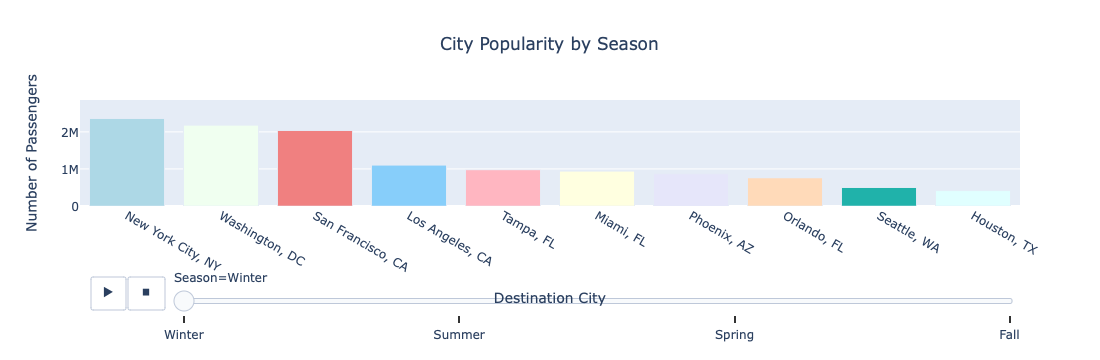

In [245]:
# Animated bar plot for city popularity by season
fig = px.bar(popular_city, 
             x='Destination City', 
             y='Passengers', 
             color='Destination City',
             color_discrete_sequence=['lightblue', 'honeydew', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lavender', 'peachpuff', 'lightseagreen', 'lightcyan'],
             animation_frame='Season', 
             title='City Popularity by Season',
             labels={'Passengers': 'Number of Passengers', 'Destination City': 'City'},
             range_y=[0, popular_city['Passengers'].max() * 1.1])
fig.update_layout(
    xaxis_title="Destination City",
    yaxis_title="Number of Passengers",
    title_x=0.5,
    showlegend=False
)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


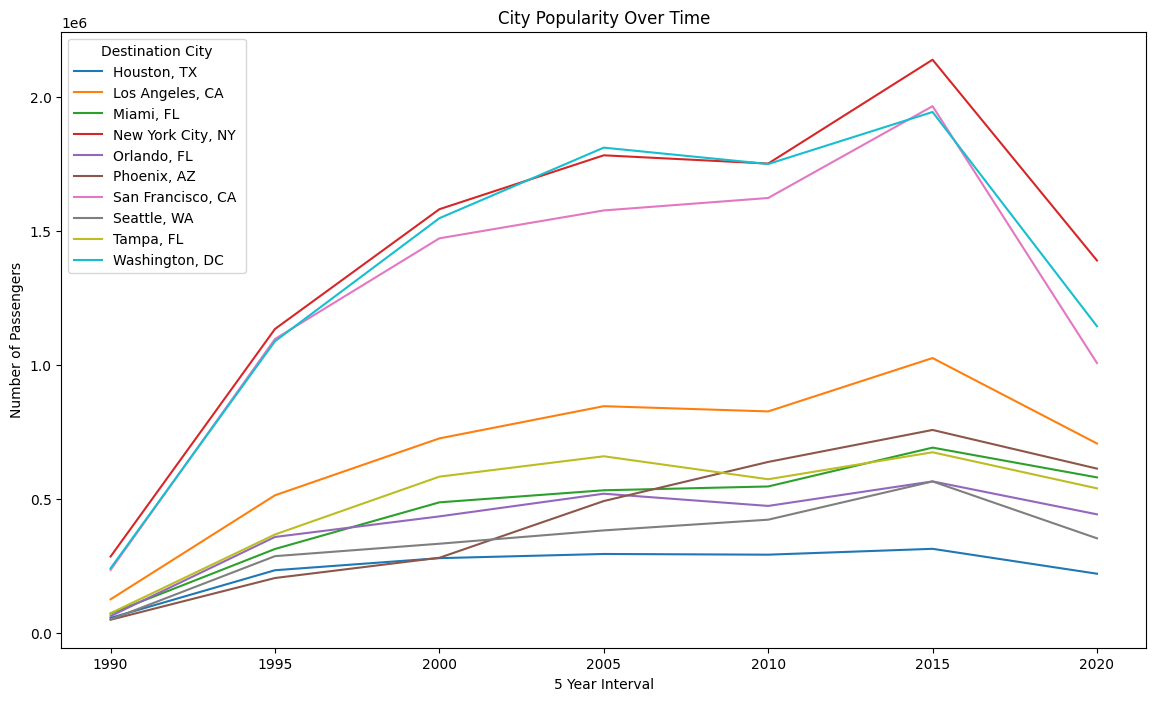

In [22]:
# Line plot for city popularity every 5 years
plt.figure(figsize=(14, 8))
sns.lineplot(data=popular_city_time, x='5 Year Interval', y='Passengers', hue='Destination City')
plt.title('City Popularity Over Time')
plt.ylabel('Number of Passengers')
plt.show()

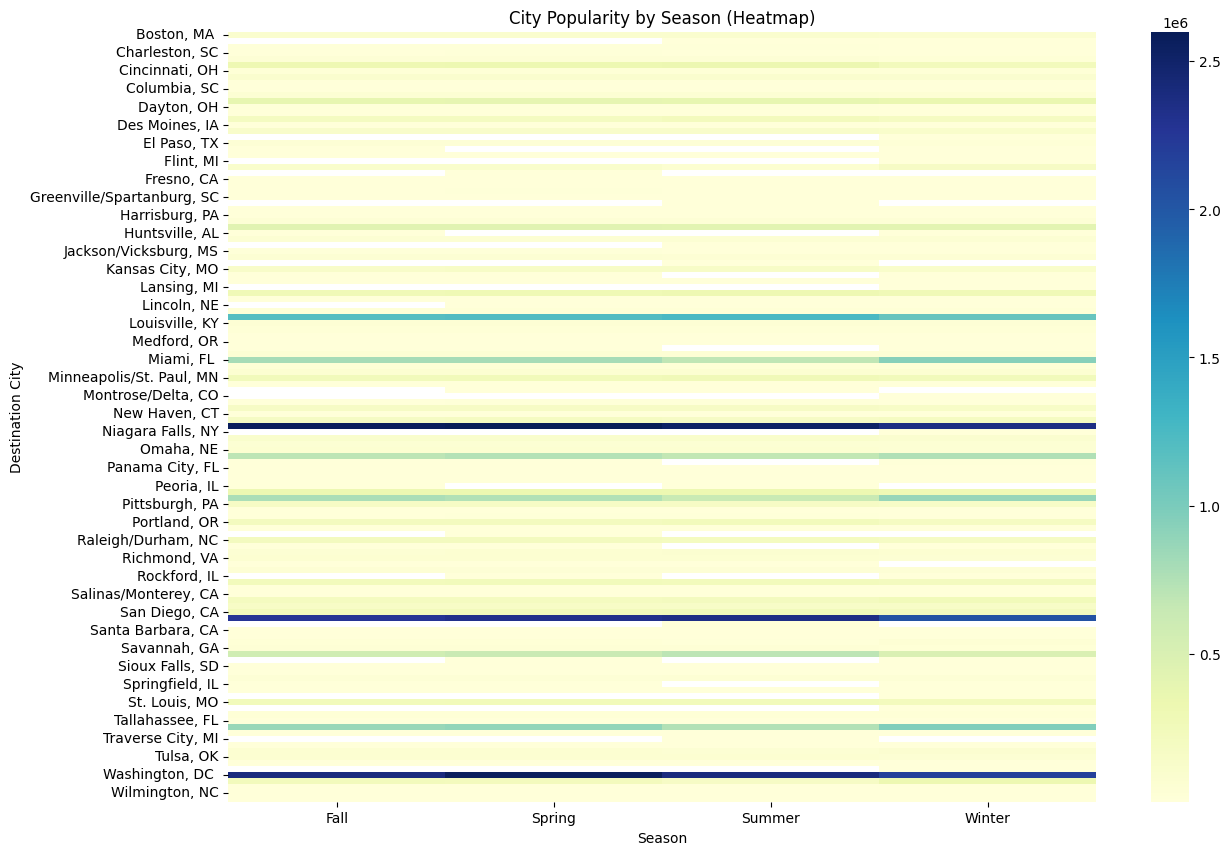

In [131]:
# Heatmap of city popularity by season
city_season_heatmap_data = season_city.pivot(index='Destination City', columns='Season', values='Passengers')

plt.figure(figsize=(14, 10))
sns.heatmap(city_season_heatmap_data, annot=False, cmap='YlGnBu')
plt.title('City Popularity by Season (Heatmap)')
plt.show()

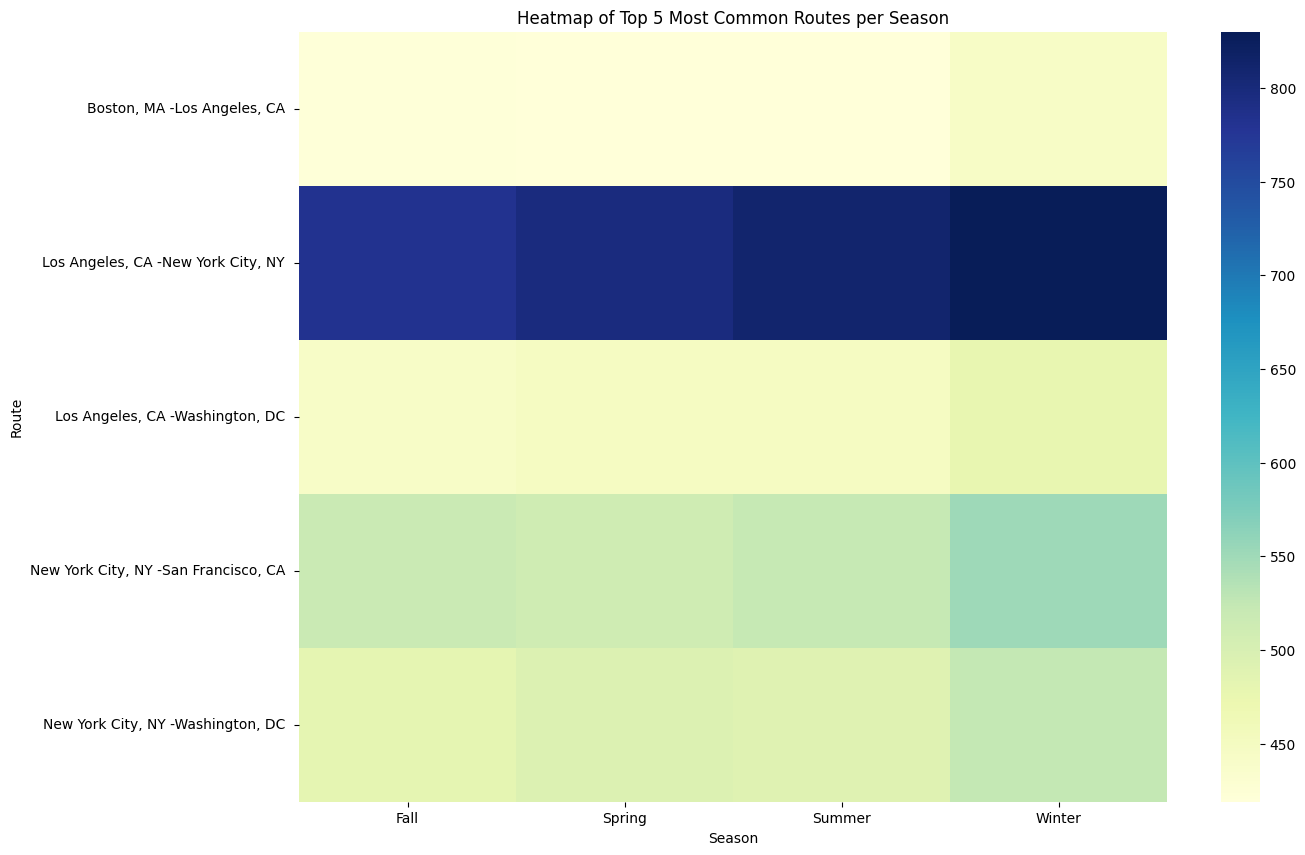

In [147]:
# Heatmap of top 5 most common routes per season
heatmap_data = most_common_routes.pivot_table(index=['Departure City', 'Destination City'], columns='Season', values='Flights', fill_value=0)

# Convert to int
heatmap_data = heatmap_data.astype(int)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Top 5 Most Common Routes per Season')
plt.ylabel('Route')
plt.xlabel('Season')
plt.show()

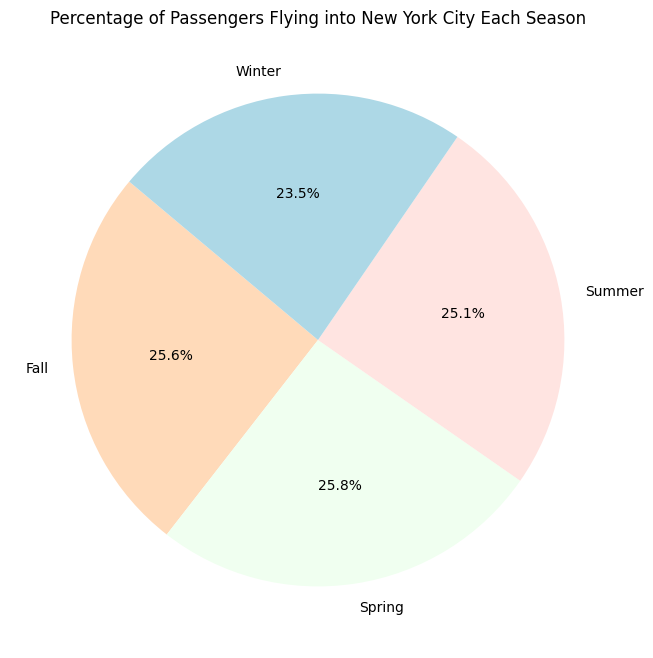

In [227]:
# Calculate the total number of passengers for each season
ny_season = popular_city[popular_city['Destination City'] == 'New York City, NY '].groupby('Season')['Passengers'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ny_season, labels=ny_season.index, autopct='%1.1f%%', startangle=140, colors=['peachpuff', 'honeydew', 'mistyrose', 'lightblue'])
plt.title('Percentage of Passengers Flying into New York City Each Season')
plt.show()

In [26]:
# # Initialize Nominatim API
# geolocator = Nominatim(user_agent="Airline_Dataset")

# for city in season_flights['Destination City']:
#     location = geolocator.geocode(city)
#     season_flights.loc[season_flights['Destination City'] == city, 'Latitude'] = location.latitude
#     season_flights.loc[season_flights['Destination City'] == city, 'Longitude'] = location.longitude

In [27]:
# # Map plot
# fig = px.scatter_geo(season_city, 
#                      locations="Destination City", 
#                      locationmode="USA-county",
#                      color="Passengers",
#                      hover_name="Destination City", 
#                      animation_frame="Season",
#                      scope="usa",
#                      title="City Popularity by Season in the U.S.")
# fig.show()